In [ ]:
# prompt: mount

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Humana files/updated_train_df.csv')
data.shape

(1527393, 146)

# Drop race null value data


In [ ]:
df = data.dropna(subset=['race'])
df.shape

(576316, 146)

In [ ]:
# prompt: generate column names, their data type and missing values .. and move it to csv

import pandas as pd

# Create a DataFrame with column names, data types, and missing values
column_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum()
})

# Save the DataFrame to a CSV file
column_info.to_csv('/content/drive/MyDrive/Humana files/column_info.csv', index=False)


#Using data with knn values imputed


In [ ]:
hum = pd.read_csv('/content/drive/MyDrive/df1_processed.csv')
hum.shape

(576316, 146)

#Using original data (0.5million rows)

In [ ]:
hum = df

In [ ]:
# prompt: check if compliant_cnt exist in df

if 'compliant_cnt' in hum.columns:
  print("compliant_cnt exists in the DataFrame.")
else:
  print("compliant_cnt does not exist in the DataFrame.")


compliant_cnt exists in the DataFrame.


#### **Preprocessing**


In [ ]:
cols_to_fill = ['quality_chronic_disease', 'quality_preventive_care',
                'quality_medication_management', 'quality_patient_safety',
                'quality_screening', 'compliant_cnt', 'QD_HEDIS',
                'QD_Patient Safety', 'QD_2020', 'QD_2021', 'QD_2022']

for col in cols_to_fill:
  if col in hum.columns:
    hum[col].fillna(0, inplace=True)

<ipython-input-6-1760dcfac2d0>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hum[col].fillna(0, inplace=True)
<ipython-input-6-1760dcfac2d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hum[col].fillna(0, inplace=True)


In [ ]:
# prompt: one hot encoding for region, sex_cd, race, channel

import pandas as pd
# Perform one-hot encoding for specified columns
'''hum = pd.get_dummies(hum, columns=['region', 'sex_cd', 'race', 'channel'], dummy_na=False)'''


In [ ]:
# prompt: convert true false to 0 and 1 in above dummy variables

'''import pandas as pd
for column in hum.columns:
  if pd.api.types.is_bool_dtype(hum[column]):
    hum[column] = hum[column].astype(int)'''


In [ ]:
# prompt: replace yes with 1 and no with 0 in 'recent_cnct_email', 'recent_cnct_print', 'recent_cnct_vat', 'recent_cnct_web', 'recent_cnct_livecall', 'recent_login_ctl'

cols_to_replace = ['recent_cnct_email', 'recent_cnct_print', 'recent_cnct_vat',
                   'recent_cnct_web', 'recent_cnct_livecall', 'recent_login_ctl']

for col in cols_to_replace:
  if col in hum.columns:
    hum[col] = hum[col].replace({'Yes': 1, 'No': 0})


<ipython-input-7-ac66620c8baa>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hum[col] = hum[col].replace({'Yes': 1, 'No': 0})
<ipython-input-7-ac66620c8baa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hum[col] = hum[col].replace({'Yes': 1, 'No': 0})


In [ ]:
if 'tenure_band' in hum.columns:
  hum['tenure_band'] = hum['tenure_band'].replace({
      '0 - 0.5 YEARS': 1,
      '0.5 - 1 YEARS': 2,
      '1 - 1.5 YEARS': 3,
      '1.5 - 2 YEARS': 4,
      '2 - 3 YEARS': 5,
      '3 - 4 YEARS': 6,
      '4 - 5 YEARS': 7,
      '5 - 6 YEARS': 8,
      '6 - 7 YEARS': 9,
      '7+ YEARS': 10
  })


<ipython-input-8-b8d5e243ed17>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hum['tenure_band'] = hum['tenure_band'].replace({
<ipython-input-8-b8d5e243ed17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hum['tenure_band'] = hum['tenure_band'].replace({


In [ ]:
# prompt: drop id, county_of_residence, mco_contract_nbr

cols_to_drop = ['id', 'county_of_residence']
hum = hum.drop(columns=cols_to_drop, errors='ignore')


In [ ]:
# prompt: drop total_ip_snf_admit_days_pmpm, region, recent_cnct_print, pcp_visit, _ESRD, riskarr_rewards, recent_cnct_web due to low feature importance after modelling

cols_to_drop_new = ['total_ip_snf_admit_days_pmpm', 'region', 'recent_cnct_print', 'pcp_visit', '_ESRD', 'riskarr_rewards', 'recent_cnct_web']
hum = hum.drop(columns=cols_to_drop_new, errors='ignore')


#### **Feature importance**

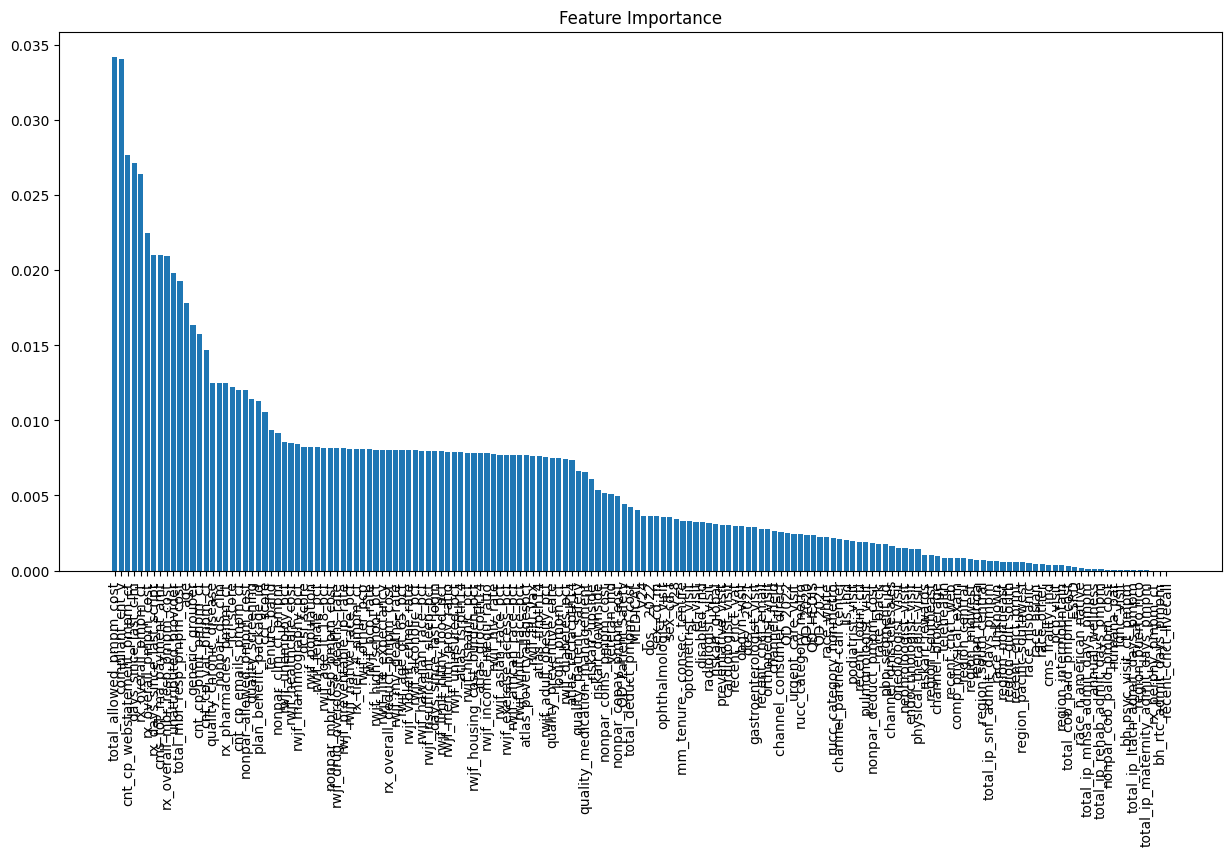

In [ ]:
# prompt: make a feature importance plot

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming 'target_variable' is the name of your target variable column
X = hum.drop('preventive_visit_gap_ind', axis=1)  # Replace 'target_variable' with your actual target column name
y = hum['preventive_visit_gap_ind']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier (you can use other models as well)
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()


In [ ]:
# prompt: get the feature importance score in excel

import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Save the DataFrame to an Excel file in your Google Drive
feature_importance_df.to_excel('/content/drive/MyDrive/Humana files/feature_importance.xlsx', index=False)


In [ ]:
# prompt: remove cms_frailty_ind, total_cob_paid_pmpm_cost, total_ip_mhsa_admit_days_pmpm, total_ip_rehab_admit_days_pmpm, nonpar_cob_paid_pmpm_cost,
# bh_psyc_visit_ct_pmpm, total_ip_ltach_admit_days_pmpm, region_puerto rico, total_ip_maternity_admit_days_pmpm, rx_perphy_pmpm_ct, bh_rtc_admit_days_pmpm, recent_cnct_livecall

cols_to_remove = ['cms_frailty_ind', 'total_cob_paid_pmpm_cost', 'total_ip_mhsa_admit_days_pmpm', 'total_ip_rehab_admit_days_pmpm', 'nonpar_cob_paid_pmpm_cost',
                  'bh_psyc_visit_ct_pmpm', 'total_ip_ltach_admit_days_pmpm', 'total_ip_maternity_admit_days_pmpm', 'rx_perphy_pmpm_ct',
                  'bh_rtc_admit_days_pmpm', 'recent_cnct_livecall']

hum = hum.drop(columns=cols_to_remove, errors='ignore')


In [ ]:
# Create a new column 'Preventive Care Visits' by summing the specified columns
hum['preventive_care_visits'] = hum['annual_wellness'] + hum['preventative_visit'] + hum['comp_physical_exam'] + hum['telehealth'] + hum['humana_paf']

# Create a new column 'Urgent and Emergency Care' by summing the specified columns
hum['urgent_and_emergency_care'] = hum['urgent_care_visit'] + hum['er_visit'] + hum['fqhc_visit']

hum['Specialist Visits'] = hum['endocrinologist_visit'] + hum['oncolologist_visit'] + hum['radiologist_visit'] + hum['podiatrist_visit'] + hum['ophthalmologist_visit'] + hum['optometrist_visit'] + hum['physical_therapist_visit'] + hum['cardiologist_visit'] + hum['gastroenterologist_visit'] + hum['orthopedist_visit'] + hum['obgyn_visit'] + hum['nephroloogist_visit'] + hum['pulmonologist_visit']


cols_to_drop = ['annual_wellness', 'endocrinologist_visit', 'oncolologist_visit', 'radiologist_visit', 'podiatrist_visit',
                'preventative_visit', 'comp_physical_exam', 'urgent_care_visit', 'er_visit', 'fqhc_visit',
                'telehealth', 'ophthalmologist_visit', 'optometrist_visit', 'physical_therapist_visit',
                'cardiologist_visit', 'gastroenterologist_visit', 'orthopedist_visit', 'obgyn_visit',
                'nephroloogist_visit', 'pulmonologist_visit', 'humana_paf']

hum = hum.drop(columns=cols_to_drop, errors='ignore')


In [ ]:
X = hum.drop('preventive_visit_gap_ind', axis=1)  # Replace 'target_variable' with your actual target column name
y = hum['preventive_visit_gap_ind']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier (you can use other models as well)
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [ ]:
# prompt: move these importance score to excel

import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Save the DataFrame to an Excel file in your Google Drive
feature_importance_df.to_excel('/content/drive/MyDrive/Humana files/feature_importance_new.xlsx', index=False)


In [ ]:
hum.shape

(576316, 108)

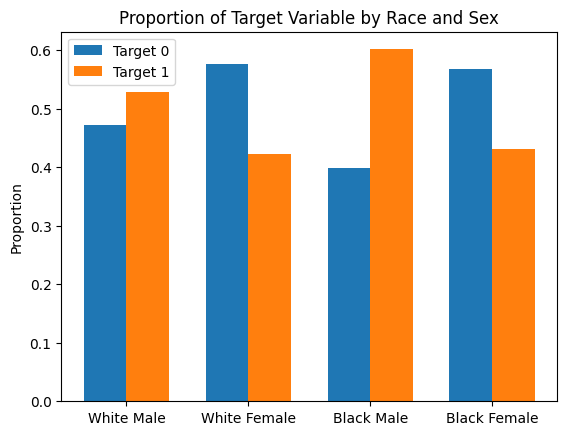

In [ ]:
# prompt: I want to see the column chart with legend = target variable (show 0 and 1) .. and x axis = white male, white female, black male, and black female.. can you show proportions

import matplotlib.pyplot as plt

# Filter the DataFrame for white and black males and females
white_male = hum[(hum['race_white'] == 1) & (hum['sex_cd_m'] == 1)]
white_female = hum[(hum['race_white'] == 1) & (hum['sex_cd_f'] == 1)]
black_male = hum[(hum['race_black'] == 1) & (hum['sex_cd_m'] == 1)]
black_female = hum[(hum['race_black'] == 1) & (hum['sex_cd_f'] == 1)]

# Calculate the proportion of target variable (0 and 1) for each group
def calculate_proportions(df):
  total_count = len(df)
  target_0_count = len(df[df['preventive_visit_gap_ind'] == 0])
  target_1_count = len(df[df['preventive_visit_gap_ind'] == 1])
  return target_0_count / total_count, target_1_count / total_count

white_male_props = calculate_proportions(white_male)
white_female_props = calculate_proportions(white_female)
black_male_props = calculate_proportions(black_male)
black_female_props = calculate_proportions(black_female)

# Create the bar chart
categories = ['White Male', 'White Female', 'Black Male', 'Black Female']
target_0_props = [white_male_props[0], white_female_props[0], black_male_props[0], black_female_props[0]]
target_1_props = [white_male_props[1], white_female_props[1], black_male_props[1], black_female_props[1]]

width = 0.35
x = range(len(categories))

fig, ax = plt.subplots()
rects1 = ax.bar(x, target_0_props, width, label='Target 0')
rects2 = ax.bar([i + width for i in x], target_1_props, width, label='Target 1')

ax.set_ylabel('Proportion')
ax.set_title('Proportion of Target Variable by Race and Sex')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(categories)
ax.legend()

plt.show()


#### **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X=hum.drop(columns=['preventive_visit_gap_ind'])
y=hum['preventive_visit_gap_ind']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((403421, 107), (172895, 107), (403421,), (172895,))

In [ ]:
# prompt: generate the list of columns in csv of X_train in excel  .. not in drive

import pandas as pd

# Assuming X_train is your DataFrame
column_list = X_train.columns.tolist()

# Create a Pandas DataFrame with the column list
df_columns = pd.DataFrame({'Columns': column_list})

# Export the DataFrame to an Excel file (without saving to Google Drive)
df_columns.to_excel('column_list.xlsx', index=False)


#### **Transforming distribution**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  QuantileTransformer, PowerTransformer, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import KNNImputer

In [ ]:
quant_k_attrs = ['cms_tot_ma_payment_amt', 'atlas_ffrpth14', 'atlas_fsrpth14', 'atlas_grocpth14', 'atlas_povertyallagespct', 'rwjf_mv_deaths_rate',
           'rwjf_violent_crime_rate', 'rwjf_population', 'rwjf_hiv_rate', 'rwjf_men_hlth_prov_ratio', 'rwjf_drug_overdose_deaths_rate',
           'rwjf_life_expectancy', 'rwjf_healthcare_cost', 'rwjf_income_inequ_ratio', 'atlas_recfacpth14', 'rwjf_pcp_rate', 'rwjf_unemploy_pct', 'rwjf_age_gt_65_pct', 'rwjf_african_race_pct', 'rwjf_native_race_pct',
'rwjf_hispanic_pct', 'rwjf_diabetes_pct', 'rwjf_hawaiian_race_pct', 'rwjf_asian_race_pct', 'rwjf_limit_hlthy_food_pct', 'rwjf_uninsured_pct',
         'rwjf_other_pcp', 'rwjf_housing_cost_burden_pct', 'rwjf_preventable_ip_rate', 'rwjf_high_school_pct','rwjf_female_pct','rwjf_white_race_pct','rwjf_exercise_access_pct','rwjf_flu_vax']


quant_attrs = ['cci_score', 'fci_score', 'dcsi_score', 'nonpar_clm_ct_pmpm', 'nonpar_allowed_pmpm_cost','nonpar_coins_pmpm_cost',
         'nonpar_copay_pmpm_cost','nonpar_deduct_pmpm_cost','nonpar_mbr_resp_pmpm_cost','nonpar_ds_clm','total_allowed_pmpm_cost',
         'total_deduct_pmpm_cost','total_mbr_resp_pmpm_cost','days_since_last_clm','rx_overall_pmpm_cost',
         'rx_overall_deduct_pmpm_cost','rx_overall_mbr_resp_pmpm_cost','rx_overall_pmpm_ct','rx_tier_4_pmpm_ct', 'rx_days_since_last_script','rx_pharmacies_pmpm_ct',
         'mm_tenure - consec_tenure','quality_chronic_disease','quality_preventive_care','quality_patient_safety','cnt_cp_emails_pmpm_ct','cnt_cp_print_pmpm_ct',
         'cnt_cp_vat_pmpm_ct','cnt_cp_webstatement_pmpm_ct','days_since_last_login','login_pmpm_ct', 'compliant_cnt', 'age']

k_s_attrs = ['rwjf_adult_obesity_pct','rwjf_alcoholic_pct','rwjf_mammography_pct','rwjf_age_lt_18_pct','rwjf_insufficient_sleep_pct', 'plan_benefit_package_id','quality_medication_management','quality_screening']

#s = ['plan_benefit_package_id','quality_medication_management','quality_screening'] (scaling them along with above k attributes just for consistency)


cat_attribs = ['channel', 'race', 'sex_cd', 'mco_contract_nbr']


passthrough_attrs = ['recent_cnct_email', 'recent_cnct_vat', 'recent_login_ctl', 'tenure_band' ]


quantile_k_pipeline = Pipeline([('imputer', KNNImputer(n_neighbors=5)),('quantile', QuantileTransformer(n_quantiles=500))])
quantile_pipeline = Pipeline([('quantile', QuantileTransformer(n_quantiles=500))])
knn_pipeline = Pipeline([('imputer', KNNImputer(n_neighbors=5)),('scaler', StandardScaler())])


quantile_k_pipeline1 = Pipeline([('imputer', KNNImputer(n_neighbors=5)),('quantile', QuantileTransformer(n_quantiles=200))])
quantile_pipeline1 = Pipeline([('quantile', QuantileTransformer(n_quantiles=200))])

cat_pipeline = Pipeline([("categorical transform", OneHotEncoder(handle_unknown="ignore"))])


In [ ]:
'''preprocessing_pipelines = [
    ColumnTransformer([
        ('q_k', quantile_k_pipeline, quant_k_attrs),
        ('q', quantile_pipeline, quant_attrs),
        ('k_s', knn_pipeline, k_s_attrs),
        ("cat", cat_pipeline, cat_attribs),
        ("map1", ordinal_pipeline1, map1_attrs),
        ("passthrough", "passthrough", passthrough_attrs),
    ], remainder='passthrough'),
    ColumnTransformer([
        ('q_k', quantile_k_pipeline, quant_k_attrs),
        ('q', quantile_pipeline, quant_attrs),
        ('k_s', knn_pipeline, k_s_attrs),
        ("cat", cat_pipeline, cat_attribs),
        ("cat1", cat_pipeline, cat_attrs1),
        ("passthrough", "passthrough", passthrough_attrs)
    ], remainder='passthrough'),
    ColumnTransformer([
        ('q_k1', quantile_k_pipeline1, quant_k_attrs),
        ('q1', quantile_pipeline1, quant_attrs),
        ('k_s', knn_pipeline, k_s_attrs),
        ("cat", cat_pipeline, cat_attribs),
        ("map1", ordinal_pipeline1, map1_attrs),
        ("passthrough", "passthrough", passthrough_attrs)
    ], remainder='passthrough'),
    ColumnTransformer([
        ('q_k', quantile_k_pipeline, quant_k_attrs),
        ('q', quantile_pipeline, quant_attrs),
        ('k_s', knn_pipeline, k_s_attrs),
        ("cat", cat_pipeline, cat_attribs),
        ("cat1", cat_pipeline, cat_attrs1),
        ("passthrough", "passthrough", passthrough_attrs)
    ], remainder='passthrough')
]'''

In [ ]:
'''# prompt: evaluate these preprocessing_pipelines for random forest .. and see which pipeline gives best roc-auc score

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have X_train, X_test, y_train, y_test defined

results = []
for i, pipeline in enumerate(preprocessing_pipelines):
  try:
    X_train_processed = pipeline.fit_transform(X_train)
    X_test_processed = pipeline.transform(X_test)

    model = RandomForestClassifier()
    model.fit(X_train_processed, y_train)

    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    results.append((i, roc_auc))
  except Exception as e:
    print(f"Error processing pipeline {i}: {e}")

best_pipeline_index, best_roc_auc = max(results, key=lambda x: x[1])
print(f"Best pipeline index: {best_pipeline_index}, Best ROC-AUC: {best_roc_auc}")
'''

In [ ]:
preprocessor = ColumnTransformer([
        ('q_k', quantile_k_pipeline, quant_k_attrs),
        ('q', quantile_pipeline, quant_attrs),
        ('k_s', knn_pipeline, k_s_attrs),
        ("cat", cat_pipeline, cat_attribs),
        ("passthrough", "passthrough", passthrough_attrs),
    ], remainder='passthrough')

In [ ]:
# Preprocess the numerical features of training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)





In [ ]:

'''# Convert the preprocessed NumPy arrays back to DataFrames with column names
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed)

# Use these DataFrames as your final training and testing sets
X_train_final = X_train_preprocessed_df
X_test_final = X_test_preprocessed_df'''

In [ ]:
# prompt: instead if column names.. it s giving me columns.. replace column names

import pandas as pd
# Assuming you have X_train_preprocessed_df and X_test_preprocessed_df defined

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Rename columns in the DataFrames
X_train_final = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_final = pd.DataFrame(X_test_preprocessed, columns=feature_names)

# Now X_train_final and X_test_final have proper column names


In [ ]:
# prompt: Transfer X_train_final, X_test_final, y_train, y_test separately in a csv file in drive.. you dont need to merge them

import pandas as pd
# Save X_train_final to a CSV file in your Google Drive
X_train_final.to_csv('/content/drive/MyDrive/Humana files/X_train_final.csv', index=False)

# Save X_test_final to a CSV file in your Google Drive
X_test_final.to_csv('/content/drive/MyDrive/Humana files/X_test_final.csv', index=False)

# Save y_train to a CSV file in your Google Drive
pd.DataFrame(y_train).to_csv('/content/drive/MyDrive/Humana files/y_train.csv', index=False)

# Save y_test to a CSV file in your Google Drive
pd.DataFrame(y_test).to_csv('/content/drive/MyDrive/Humana files/y_test.csv', index=False)


In [ ]:
 #Create a DataFrame with the column names
column_names_df = pd.DataFrame({'Column Names': X_train_final.columns})

# Save the DataFrame to an Excel file
column_names_df.to_excel('column_names_7777X_train.xlsx', index=False)



###### **Reweighing using AIF360**

In [ ]:
# Combine X_train_final and y_train into a single dataframe for AIF360 compatibility
train_data = pd.concat([X_train_final.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

In [ ]:
!pip install aif360

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
!pip install 'aif360[Reductions]'
!pip install 'aif360[Reductions]'
!pip install 'aif360[inFairness]'
!pip install 'aif360[Reductions]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.4/835.4 kB 28.4 MB/s eta 0:00:00


In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing

# Convert to BinaryLabelDataset (AIF360 format)
train_bld = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=train_data,
    label_names=['preventive_visit_gap_ind'],
    protected_attribute_names=['cat__sex_cd_f', 'cat__sex_cd_m',
                               'cat__race_asian', 'cat__race_black', 'cat__race_hispanic', 'cat__race_n american native',
                               'cat__race_other', 'cat__race_unknown', 'cat__race_white'])

reweighing = Reweighing(
    unprivileged_groups=[{'cat__sex_cd_f': 1},
    {'cat__race_black': 1},
    {'cat__race_hispanic': 1},
    {'cat__race_asian': 1},
    {'cat__race_n american native': 1},
    {'cat__race_other': 1},
    {'cat__race_unknown': 1}],
    privileged_groups=[{'cat__sex_cd_m': 1}, {'cat__race_white': 1}]
)

/usr/local/lib/python3.10/dist-packages/inFairness/utils/ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
/usr/local/lib/python3.10/dist-packages/inFairness/utils/ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  monte_carlo_vect_ndcg = vmap(vect_normalized_discounted

In [ ]:
reweighing.fit(train_bld)
train_bld_reweighed = reweighing.transform(train_bld)

# Extract instance weights from the reweighed dataset
instance_weights = train_bld_reweighed.instance_weights

###### **Comparing all models (with default parameters)**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 24.0 MB/s eta 0:00:00


In [ ]:
# prompt: i want to fit 5 models including random forest, xg boost, catboost, adaboost , light gbm .. with initial parameters .. and use sample_weight=instance_weights while fitting.. and then get the roc-auc score for each one

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

results = {}
for model_name, model in models.items():
  try:
    model.fit(X_train_final, y_train, sample_weight=instance_weights)
    y_pred_proba = model.predict_proba(X_test_final)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    results[model_name] = roc_auc
  except Exception as e:
    print(f"Error fitting {model_name}: {e}")

for model_name, roc_auc in results.items():
  print(f"{model_name}: ROC-AUC = {roc_auc}")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 193353, number of negative: 210068
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15908
[LightGBM] [Info] Number of data points in the train set: 403421, number of used features: 126
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494560 -> initscore=-0.021760
[LightGBM] [Info] Start training from score -0.021760
Logistic Regression: ROC-AUC = 0.7386650166476512
Random Forest: ROC-AUC = 0.7859883885898173
XGBoost: ROC-AUC = 0.78838308421266
CatBoost: ROC-AUC = 0.7955924599984826
AdaBoost: ROC-AUC = 0.7416564403206617
LightGBM: ROC-AUC = 0.7803295971167044


In [ ]:
# prompt: make a voting classifier using catboost, xgboost, random forest and lightgbm

from sklearn.ensemble import VotingClassifier

# Create a VotingClassifier with the desired models
voting_classifier = VotingClassifier(
    estimators=[
        ('catboost', CatBoostClassifier(verbose=0)),
        ('xgboost', XGBClassifier()),
        ('random_forest', RandomForestClassifier()),
        ('lightgbm', LGBMClassifier())
    ],
    voting='soft'  # Use 'soft' voting for probability-based voting
)

# Train the VotingClassifier
voting_classifier.fit(X_train_final, y_train, sample_weight=instance_weights)

# Make predictions and evaluate the ROC-AUC score
y_pred_proba = voting_classifier.predict_proba(X_test_final)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Voting Classifier ROC-AUC: {roc_auc}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 193353, number of negative: 210068
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15908
[LightGBM] [Info] Number of data points in the train set: 403421, number of used features: 126
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494560 -> initscore=-0.021760
[LightGBM] [Info] Start training from score -0.021760
Voting Classifier ROC-AUC: 0.7955673531103491


In [ ]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# prompt: similarly make one stacking model too using these individual models

from sklearn.ensemble import StackingClassifier

# Define the base models
base_models = [
    ('catboost', CatBoostClassifier(verbose=0)),
    ('xgboost', XGBClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('lightgbm', LGBMClassifier())
]

# Define the meta-learner (model that combines predictions from base models)
meta_learner = LogisticRegression()  # You can choose a different model here

# Create the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5  # Number of cross-validation folds for training the meta-learner
)

# Train the stacking classifier
stacking_classifier.fit(X_train_final, y_train, sample_weight=instance_weights)

# Make predictions and evaluate the ROC-AUC score
y_pred_proba = stacking_classifier.predict_proba(X_test_final)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Stacking Classifier ROC-AUC: {roc_auc}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 193353, number of negative: 210068
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15902
[LightGBM] [Info] Number of data points in the train set: 403421, number of used features: 126
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494560 -> initscore=-0.021760
[LightGBM] [Info] Start training from score -0.021760
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 154682, number of negative: 168054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `

In [ ]:
# prompt: GENERATE FEATURE IMPORTANCE SCORE USING STACKING AND STORE IN EXCEL FILE

import pandas as pd

# Assuming stacking_classifier is your trained StackingClassifier
try:
    # Get feature importances from the final estimator (meta-learner)
    if hasattr(stacking_classifier.final_estimator, 'feature_importances_'):
        feature_importances = stacking_classifier.final_estimator.feature_importances_
        feature_names = X_train_final.columns
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

        # Save the DataFrame to an Excel file
        feature_importance_df.to_excel('/content/drive/MyDrive/Humana files/stacking_feature_importance.xlsx', index=False)
    elif hasattr(stacking_classifier.final_estimator, 'coef_'):
        # For models like Logistic Regression, use coefficients as importance
        feature_importances = stacking_classifier.final_estimator.coef_[0]
        feature_names = X_train_final.columns
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

        # Save the DataFrame to an Excel file
        feature_importance_df.to_excel('/content/drive/MyDrive/Humana files/stacking_feature_importance.xlsx', index=False)
    else:
        print("The meta-learner does not provide feature importances.")

except Exception as e:
    print(f"Error generating feature importance: {e}")


The meta-learner does not provide feature importances.


In [ ]:
# prompt: GENERATE FEATURE IMPORTANCE USING CATBOOST DEFAULT MODEL AND MOVE THAT TO EXCEL

import pandas as pd
# Assuming you have your trained CatBoost model
catboost_model = CatBoostClassifier(verbose=0)
catboost_model.fit(X_train_final, y_train, sample_weight=instance_weights)

# Get feature importances
feature_importances = catboost_model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_final.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Save the DataFrame to an Excel file in your Google Drive
feature_importance_df.to_excel('/content/drive/MyDrive/Humana files/catboost_feature_importance.xlsx', index=False)


In [ ]:
# prompt: GENERATE FEATURE IMPORTANCE USING RANDOM FOREST AND MOVE THAT TO EXCEL

import pandas as pd
# Assuming you have your trained Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_final, y_train, sample_weight=instance_weights)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_final.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Save the DataFrame to an Excel file in your Google Drive
feature_importance_df.to_excel('/content/drive/MyDrive/Humana files/rf_feature_importance.xlsx', index=False)


In [ ]:
# prompt: install shap

!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 19.8 MB/s eta 0:00:00


In [ ]:
# prompt: make a confusion matrix.. importance plot, and shap values chart

import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Assuming you have y_test and the predictions from your best model (e.g., stacking_classifier)
y_pred = stacking_classifier.predict(X_test_final)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




NameError: name 'stacking_classifier' is not defined

In [ ]:
# Assuming 'stacking_classifier' is your best model
importances = stacking_classifier.final_estimator.coef_[0]  # Assuming it's a linear model as the final estimator
feature_names = X_train_final.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(len(feature_names)), feature_importance_df['Importance'])
plt.xticks(range(len(feature_names)), feature_importance_df['Feature'], rotation=90)
plt.show()





In [ ]:
# prompt: move these feature importance score to csv file in drive

# Assuming feature_importance_df is defined as in your previous code

# Save the DataFrame to a CSV file in your Google Drive
feature_importance_df.to_csv('/content/drive/MyDrive/Humana files/feature_importance_stacking.csv', index=False)


In [ ]:
# prompt: make a chart for Roc curve and precision recall curve

from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_proba are defined from your best model's predictions

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [ ]:
# Assuming 'stacking_classifier' is your best model and you have X_test_final
explainer = shap.Explainer(stacking_classifier.predict, X_test_final)
shap_values = explainer(X_test_final)

# Plot summary plot of SHAP values
shap.summary_plot(shap_values, X_test_final)


In [ ]:
# prompt: move these shap values score in csv file

import pandas as pd
shap_values_df = pd.DataFrame(shap_values.values)
shap_values_df.to_csv('/content/drive/MyDrive/Humana files/shap_values.csv', index=False)


In [ ]:
# prompt: can you save this stacking model so that i can use this later too if in case i disconnect

import pickle

# Save the stacking classifier model to a file
with open('/content/drive/MyDrive/Humana files/stacking_model.pkl', 'wb') as f:
  pickle.dump(stacking_classifier, f)

# Save the preprocessor to a file
with open('/content/drive/MyDrive/Humana files/preprocessor.pkl', 'wb') as f:
  pickle.dump(preprocessor, f)


In [ ]:
# Define the base models
base_models = [
    ('catboost_base', CatBoostClassifier(verbose=0)),
    ('random_forest', RandomForestClassifier()),
    ('xgboost', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
    ('lightgbm', LGBMClassifier())
]

# Define the meta-learner (using CatBoost)
meta_learner = CatBoostClassifier(verbose=0)

# Create the stacking classifier
stacking_classifier_cat = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5  # Number of cross-validation folds for training the meta-learner
)

# Train the stacking classifier
stacking_classifier_cat.fit(X_train_final, y_train)

# Make predictions and evaluate the ROC-AUC score
y_pred_proba = stacking_classifier_cat.predict_proba(X_test_final)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Stacking Classifier ROC-AUC: {roc_auc}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:19:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 193353, number of negative: 210068
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15908
[LightGBM] [Info] Number of data points in the train set: 403421, number of used features: 126
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.479283 -> initscore=-0.082914
[LightGBM] [Info] Start training from score -0.082914


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:41:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:41:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:41:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:41:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:41:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 154682, number of negative: 168054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15892
[LightGBM] [Info] Number of data points in the train set: 322736, number of used features: 125
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.479283 -> initscore=-0.082914
[LightGBM] [Info] Start training from score -0.082914
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 154683, number of negative: 168054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `

###### **Hyperparameter tuning for Catboost**

In [ ]:
# prompt: install skopt and skopt.space

!pip install scikit-optimize


In [ ]:
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_final, y_train, train_size=0.1, random_state=42)

In [ ]:
X_train_sample.shape

(40342, 126)

In [ ]:
train_data_sample = pd.concat([X_train_sample.reset_index(drop=True), y_train_sample.reset_index(drop=True)], axis=1)
train_bld_sample = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=train_data_sample,
    label_names=['preventive_visit_gap_ind'],
    protected_attribute_names=['cat__sex_cd_f', 'cat__sex_cd_m',
                               'cat__race_asian', 'cat__race_black', 'cat__race_hispanic', 'cat__race_n american native',
                               'cat__race_other', 'cat__race_unknown', 'cat__race_white'])

reweighing = Reweighing(
    unprivileged_groups=[{'cat__sex_cd_f': 1},
    {'cat__race_black': 1},
    {'cat__race_hispanic': 1},
    {'cat__race_asian': 1},
    {'cat__race_n american native': 1},
    {'cat__race_other': 1},
    {'cat__race_unknown': 1}],
    privileged_groups=[{'cat__sex_cd_m': 1}, {'cat__race_white': 1}]
)

reweighing.fit(train_bld_sample)
train_bld_reweighed = reweighing.transform(train_bld_sample)

# Extract instance weights from the reweighed dataset
instance_weights_sample = train_bld_reweighed.instance_weights

In [ ]:
# prompt: generate a code for bayesian hyperparameter tuning for catboost

from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Define the parameter space for CatBoost
param_space = {
    'iterations': Integer(100, 500),  # Reduce the max iterations
    'learning_rate': Real(0.05, 0.2, prior='log-uniform'),  # Narrow down learning rate
    'depth': Integer(4, 8),  # Reduce the range of depth
    'l2_leaf_reg': Integer(1, 5),  # Reduce L2 regularization range
    'border_count': Integer(32, 100),  # Reduce the range
    'random_strength': Real(1e-9, 5, prior='log-uniform'),  # Reduce the range
    'bagging_temperature': Real(0.0, 0.5),  # Narrow down the range
    'od_type': Categorical(['IncToDec']),  # Fix some parameters if less critical
    'od_wait': Integer(10, 30),  # Reduce the range
    'verbose': [0]
}


# Create a CatBoost classifier
model = CatBoostClassifier()

# Create the Bayesian optimization search
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=15,  # Number of iterations for the search
    cv=5,  # Number of cross-validation folds
    scoring='roc_auc',  # Metric to optimize
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
    verbose=0
)

# Fit the Bayesian optimization search to your data
bayes_search.fit(X_train_sample, y_train_sample, sample_weight=instance_weights_sample)

# Get the best hyperparameters
best_params = bayes_search.best_params_
print(f"Best hyperparameters: {best_params}")



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


KeyboardInterrupt: 

In [ ]:
# Train a CatBoost model with the best hyperparameters
from sklearn.model_selection import KFold
params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'depth': 6,
    'l2_leaf_reg': 3,
    'border_count': 32,
    'bagging_temperature': 1,
    'random_strength': 1,
    'od_type': 'Iter',
    'od_wait': 20,
    'eval_metric': 'AUC',
    'verbose': 100
}
# Step 2: Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# Step 3: Perform K-Fold Cross-Validation
for train_index, val_index in kf.split(X_train_final):
    # Use .iloc to index the DataFrame
    X_tr, X_val = X_train_final.iloc[train_index], X_train_final.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]  # Ensure y_train is a DataFrame/Series

    # Step 4: Create and fit the CatBoost model
    model = CatBoostClassifier(**params)
    model.fit(X_tr, y_tr, eval_set=(X_val, y_val), verbose=100)

    # Step 5: Predict probabilities on the validation set
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Step 6: Calculate AUC score for this fold
    auc = roc_auc_score(y_val, y_pred_proba)
    auc_scores.append(auc)

# Step 7: Calculate the average AUC score across all folds
mean_auc = np.mean(auc_scores)
print(f"Mean AUC Score from Cross-Validation: {mean_auc:.4f}")

0:	test: 0.6989247	best: 0.6989247 (0)	total: 40.1ms	remaining: 20s
100:	test: 0.7686353	best: 0.7686353 (100)	total: 3.98s	remaining: 15.7s
200:	test: 0.7815759	best: 0.7815759 (200)	total: 8.11s	remaining: 12.1s
300:	test: 0.7876477	best: 0.7876477 (300)	total: 12.5s	remaining: 8.23s
400:	test: 0.7911206	best: 0.7911207 (399)	total: 16.3s	remaining: 4.04s
499:	test: 0.7932530	best: 0.7932530 (499)	total: 20.2s	remaining: 0us

bestTest = 0.793253038
bestIteration = 499

0:	test: 0.6989821	best: 0.6989821 (0)	total: 42.5ms	remaining: 21.2s
100:	test: 0.7666586	best: 0.7666586 (100)	total: 4.4s	remaining: 17.4s
200:	test: 0.7799764	best: 0.7799764 (200)	total: 8.28s	remaining: 12.3s
300:	test: 0.7863045	best: 0.7863045 (300)	total: 12.2s	remaining: 8.08s
400:	test: 0.7895949	best: 0.7895949 (400)	total: 16.7s	remaining: 4.13s
499:	test: 0.7918304	best: 0.7918304 (499)	total: 20.5s	remaining: 0us

bestTest = 0.7918303756
bestIteration = 499

0:	test: 0.7067223	best: 0.7067223 (0)	total: 

In [ ]:
# Step 8: Optional - Evaluate the model on the test set
final_model = CatBoostClassifier(**params)
final_model.fit(X_train_final, y_train)
y_test_pred_proba = final_model.predict_proba(X_test_final)[:, 1]
test_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"AUC Score on Test Set: {test_auc:.4f}")

0:	total: 49.6ms	remaining: 24.7s
100:	total: 5.41s	remaining: 21.4s
200:	total: 10.3s	remaining: 15.3s
300:	total: 14.4s	remaining: 9.54s
400:	total: 18.9s	remaining: 4.67s
499:	total: 23.4s	remaining: 0us
AUC Score on Test Set: 0.7918


### Previous version model fitting

###### **Training Model: Random Forest**

In [ ]:
# Train a Random Forest model using instance weights
model = RandomForestClassifier(
    n_estimators=500,          # Number of trees
    max_depth=None,            # No limit on tree depth
    min_samples_split=5,       # Minimum samples required to split a node
    min_samples_leaf=2,        # Minimum samples required at a leaf node
    max_features='sqrt',       # Number of features to consider for the best split
    bootstrap=True,            # Use bootstrap samples
    random_state=42            # For reproducibility
)
model.fit(X_train_final, y_train, sample_weight=instance_weights)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred = model.predict(X_test_final)

# Calculate predicted probabilities (needed for ROC-AUC score)
y_pred_proba = model.predict_proba(X_test_final)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

ROC-AUC Score: 0.7930
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.74     75024
           1       0.74      0.64      0.69     69055

    accuracy                           0.72    144079
   macro avg       0.72      0.72      0.72    144079
weighted avg       0.72      0.72      0.72    144079

Confusion Matrix:
[[59092 15932]
 [24673 44382]]


In [ ]:
# prompt: basis above random forest model, get the feature importance score and save it in csv

import pandas as pd
# Get feature importances from the trained Random Forest model
importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_final.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Save the DataFrame to a CSV file
feature_importance_df.to_csv('feature_importance_rf.csv', index=False)


###### **Fairness metric calculation**

In [ ]:
from aif360.metrics import ClassificationMetric
from aif360.datasets import BinaryLabelDataset

# Step 1: Convert test data into a BinaryLabelDataset (AIF360 format)
test_data = pd.concat([X_test_final.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
test_bld = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=test_data,
    label_names=['preventive_visit_gap_ind'],
    protected_attribute_names=['sex_cd_f', 'sex_cd_m',
                               'race_asian', 'race_black', 'race_hispanic', 'race_n american native',
                               'race_other', 'race_unknown', 'race_white'])

# Step 2: Create BinaryLabelDataset for the predictions
# Add predictions to the test dataset for AIF360
y_pred_bld = test_data.copy()
y_pred_bld['preventive_visit_gap_ind'] = y_pred  # Replace the target with the predicted values

pred_bld = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=y_pred_bld,
    label_names=['preventive_visit_gap_ind'],
    protected_attribute_names=['sex_cd_f', 'sex_cd_m',
                               'race_asian', 'race_black', 'race_hispanic', 'race_n american native',
                               'race_other', 'race_unknown', 'race_white'])

# Step 3: Initialize the ClassificationMetric object
metric = ClassificationMetric(test_bld, pred_bld,
                              unprivileged_groups = [ {'race_black': 1},
                       {'race_hispanic': 1},
                       {'race_asian': 1},
                       {'race_n american native': 1},
                       {'race_other': 1},
                       {'race_unknown': 1}],

# Define privileged groups (males, whites)
privileged_groups = [{'race_white': 1}])



In [ ]:
# Step 4: Compute Equal Opportunity Difference (TPR difference)
equal_opportunity_diff = metric.equal_opportunity_difference()
print(f'Equal Opportunity Difference: {equal_opportunity_diff:.4f}')

# Step 5: Print other fairness metrics if needed
tpr_unprivileged = metric.true_positive_rate(privileged=False)
tpr_privileged = metric.true_positive_rate(privileged=True)
print(f'TPR for Unprivileged Group: {tpr_unprivileged:.4f}')
print(f'TPR for Privileged Group: {tpr_privileged:.4f}')

Equal Opportunity Difference: 0.0561
TPR for Unprivileged Group: 0.6676
TPR for Privileged Group: 0.6115


##### **Training Model: XGBoost**

In [ ]:
from xgboost import XGBClassifier

params = {
    'objective': 'binary:logistic',  # For binary classification
    'learning_rate': 0.05,  # Lower learning rate for more stable training
    'max_depth': 10,  # Moderate depth to handle complexity
    'min_child_weight': 5,  # Higher value to reduce overfitting
    'subsample': 0.8,  # Use 80% of training samples for each tree
    'colsample_bytree': 0.8,  # Use 80% of features for each tree
    'n_estimators': 500,  # More boosting rounds for better learning
}

# Initialize the XGBoost classifier
model_xg = XGBClassifier(**params)
model_xg.fit(X_train_final, y_train, sample_weight=instance_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model_xg.predict(X_test_final)

# Calculate predicted probabilities (needed for ROC-AUC score)
y_pred_proba = model_xg.predict_proba(X_test_final)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

ROC-AUC Score: 0.7983
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     75024
           1       0.73      0.66      0.69     69055

    accuracy                           0.72    144079
   macro avg       0.72      0.72      0.72    144079
weighted avg       0.72      0.72      0.72    144079

Confusion Matrix:
[[58324 16700]
 [23428 45627]]


In [ ]:
# prompt: generate feature importance score using Xgboost model above on X_train_final .. and get the feature importance score in csv

import pandas as pd
# Get feature importances from the XGBoost model
importances = model_xg.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_final.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Save the DataFrame to a CSV file in your Google Drive
feature_importance_df.to_csv('/content/drive/MyDrive/Humana files/feature_importance_xgboost.csv', index=False)


##### **Fairness Metric calculation**

In [ ]:
# Step 1: Convert test data into a BinaryLabelDataset (AIF360 format)
test_data = pd.concat([X_test_final.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
test_bld = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=test_data,
    label_names=['preventive_visit_gap_ind'],
    protected_attribute_names=['sex_cd_f', 'sex_cd_m',
                               'race_asian', 'race_black', 'race_hispanic', 'race_n american native',
                               'race_other', 'race_unknown', 'race_white'])

# Step 2: Create BinaryLabelDataset for the predictions
# Add predictions to the test dataset for AIF360
y_pred_bld = test_data.copy()
y_pred_bld['preventive_visit_gap_ind'] = y_pred  # Replace the target with the predicted values

pred_bld = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=y_pred_bld,
    label_names=['preventive_visit_gap_ind'],
    protected_attribute_names=['sex_cd_f', 'sex_cd_m',
                               'race_asian', 'race_black', 'race_hispanic', 'race_n american native',
                               'race_other', 'race_unknown', 'race_white'])

# Step 3: Initialize the ClassificationMetric object
metric = ClassificationMetric(test_bld, pred_bld,
                              unprivileged_groups = [ {'race_black': 1},
                       {'race_hispanic': 1},
                       {'race_asian': 1},
                       {'race_n american native': 1},
                       {'race_other': 1},
                       {'race_unknown': 1}],

# Define privileged groups (males, whites)
privileged_groups = [{'race_white': 1}])



In [ ]:
# Step 4: Compute Equal Opportunity Difference (TPR difference)
equal_opportunity_diff = metric.equal_opportunity_difference()
print(f'Equal Opportunity Difference: {equal_opportunity_diff:.4f}')

# Step 5: Print other fairness metrics if needed
tpr_unprivileged = metric.true_positive_rate(privileged=False)
tpr_privileged = metric.true_positive_rate(privileged=True)
print(f'TPR for Unprivileged Group: {tpr_unprivileged:.4f}')
print(f'TPR for Privileged Group: {tpr_privileged:.4f}')

Equal Opportunity Difference: 0.0606
TPR for Unprivileged Group: 0.6963
TPR for Privileged Group: 0.6357


##### **Training Model: CatBoost**

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

# Initialize CatBoost Classifier
model_cb = CatBoostClassifier(random_seed=42, verbose=0)  # Set verbose=0 to suppress output

# Fit the model to the training data with instance weights
model_cb.fit(X_train_final, y_train, sample_weight=instance_weights)

In [ ]:
# Predict on the test set
y_pred = model_cb.predict(X_test_final)

# Calculate predicted probabilities (needed for ROC-AUC score)
y_pred_proba = model_cb.predict_proba(X_test_final)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

ROC-AUC Score: 0.7977
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     75024
           1       0.73      0.66      0.69     69055

    accuracy                           0.72    144079
   macro avg       0.72      0.72      0.72    144079
weighted avg       0.72      0.72      0.72    144079

Confusion Matrix:
[[58415 16609]
 [23603 45452]]


In [ ]:
# Step 1: Convert test data into a BinaryLabelDataset (AIF360 format)
test_data = pd.concat([X_test_final.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
test_bld = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=test_data,
    label_names=['preventive_visit_gap_ind'],
    protected_attribute_names=['sex_cd_f', 'sex_cd_m',
                               'race_asian', 'race_black', 'race_hispanic', 'race_n american native',
                               'race_other', 'race_unknown', 'race_white'])

# Step 2: Create BinaryLabelDataset for the predictions
# Add predictions to the test dataset for AIF360
y_pred_bld = test_data.copy()
y_pred_bld['preventive_visit_gap_ind'] = y_pred  # Replace the target with the predicted values

pred_bld = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=y_pred_bld,
    label_names=['preventive_visit_gap_ind'],
    protected_attribute_names=['sex_cd_f', 'sex_cd_m',
                               'race_asian', 'race_black', 'race_hispanic', 'race_n american native',
                               'race_other', 'race_unknown', 'race_white'])

# Step 3: Initialize the ClassificationMetric object
metric = ClassificationMetric(test_bld, pred_bld,
                              unprivileged_groups = [ {'race_black': 1},
                       {'race_hispanic': 1},
                       {'race_asian': 1},
                       {'race_n american native': 1},
                       {'race_other': 1},
                       {'race_unknown': 1}],

# Define privileged groups (males, whites)
privileged_groups = [{'race_white': 1}])



##### **Fairness Metric calculation**

In [ ]:
# Step 4: Compute Equal Opportunity Difference (TPR difference)
equal_opportunity_diff = metric.equal_opportunity_difference()
print(f'Equal Opportunity Difference: {equal_opportunity_diff:.4f}')

# Step 5: Print other fairness metrics if needed
tpr_unprivileged = metric.true_positive_rate(privileged=False)
tpr_privileged = metric.true_positive_rate(privileged=True)
print(f'TPR for Unprivileged Group: {tpr_unprivileged:.4f}')
print(f'TPR for Privileged Group: {tpr_privileged:.4f}')

Equal Opportunity Difference: 0.0627
TPR for Unprivileged Group: 0.7088
TPR for Privileged Group: 0.6460


### **Fitting on full dataset**

In [ ]:
# combine X_train_final and X_test_final
X_final = pd.concat([X_train_final, X_test_final], axis=0)
y_final = pd.concat([y_train, y_test], axis=0)


In [ ]:
# Combine X_final and y_final for AIF360 Balanced datasets

# Combine X_final and y_final into a single dataframe for AIF360 compatibility
final_data = pd.concat([X_final.reset_index(drop=True), y_final.reset_index(drop=True)], axis=1)


# Convert to BinaryLabelDataset (AIF360 format)
fulldataset_bld = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=final_data,
    label_names=['preventive_visit_gap_ind'],
    protected_attribute_names=['cat__sex_cd_f', 'cat__sex_cd_m',
                               'cat__race_asian', 'cat__race_black', 'cat__race_hispanic', 'cat__race_n american native',
                               'cat__race_other', 'cat__race_unknown', 'cat__race_white'])

reweighing = Reweighing(
    unprivileged_groups=[{'cat__sex_cd_f': 1},
    {'cat__race_black': 1},
    {'cat__race_hispanic': 1},
    {'cat__race_asian': 1},
    {'cat__race_n american native': 1},
    {'cat__race_other': 1},
    {'cat__race_unknown': 1}],
    privileged_groups=[{'cat__sex_cd_m': 1}, {'cat__race_white': 1}]
)

reweighing.fit(train_bld)
fulldataset_bld_reweighed = reweighing.transform(fulldataset_bld)

# Extract instance weights from the reweighed dataset
instance_weights = fulldataset_bld_reweighed.instance_weights

In [ ]:
stacking_classifier.fit(X_final, y_final, sample_weight=instance_weights)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 276219, number of negative: 300097
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15892
[LightGBM] [Info] Number of data points in the train set: 576316, number of used features: 126
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494549 -> initscore=-0.021805
[LightGBM] [Info] Start training from score -0.021805
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 220975, number of negative: 240077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `

StackingClassifier(cv=5,
                   estimators=[('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7aac96bf3eb0>),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=No...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('random_forest', RandomForestClassifier()),
                               ('lightgbm', LGBMClassifier())],
                   final_estimator=LogisticRegression())

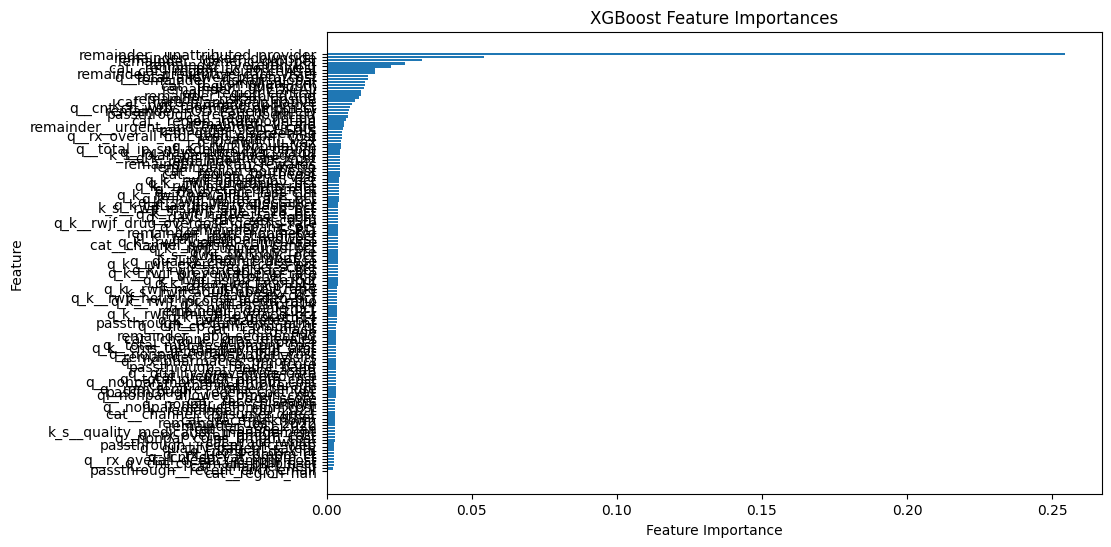

In [ ]:
# prompt: create a feature importance plot for xgb classifier..

'''import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained XGBoost model
feature_importances = model_xg.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_final.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
plt.show()'''


In [ ]:
# prompt: get these feature importance score in csv

'''# Save feature importance to CSV
feature_importance_df.to_csv('feature_importance_scores.csv', index=False)'''


In [ ]:
# prompt: get the scores in csv file and store in drive

'''import csv

# Assuming you have the following variables:
# roc_auc, equal_opportunity_diff, tpr_unprivileged, tpr_privileged (from your model evaluations)

scores_data = [
    ['Metric', 'Score'],
    ['ROC-AUC', roc_auc],
    ['Equal Opportunity Difference', equal_opportunity_diff],
    ['TPR Unprivileged', tpr_unprivileged],
    ['TPR Privileged', tpr_privileged],
]

# Define the file path in your Google Drive
file_path = '/content/drive/My Drive/model_scores.csv'

# Write the data to a CSV file
with open(file_path, 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerows(scores_data)

print(f'Scores saved to {file_path}')
'''

### **Working on holdout dataset**

In [ ]:
hold = pd.read_csv('/content/drive/MyDrive/Humana files/updated_holdout_df.csv')
hold.shape

(381976, 145)

In [ ]:
hold.shape

(381976, 145)

In [ ]:
# prompt: rename column names 'cms_tot_ma_payment_amt': 'cms_tot_ma_payment_amt'
# 'atlas_recfacpth14': 'atlas_recfacpth14'
# 'atlas_ffrpth14': 'atlas_ffrpth14'
# 'atlas_fsrpth14': 'atlas_fsrpth14'
# 'atlas_grocpth14': 'atlas_grocpth14'

hold = hold.rename(columns={
    'cms_tot_ma_payment_amt': 'cms_tot_ma_payment_amt',
    'atlas_recfacpth14': 'atlas_recfacpth14',
    'atlas_ffrpth14': 'atlas_ffrpth14',
    'atlas_fsrpth14': 'atlas_fsrpth14',
    'atlas_grocpth14': 'atlas_grocpth14',
    'atlas_povertyallagespct': 'atlas_povertyallagespct',
'cci_score': 'cci_score',
'fci_score': 'fci_score',
'dcsi_score': 'dcsi_score',
'cnt_cp_emails_pmpm_ct': 'cnt_cp_emails_pmpm_ct',
'cnt_cp_print_pmpm_ct': 'cnt_cp_print_pmpm_ct',
'cnt_cp_vat_pmpm_ct': 'cnt_cp_vat_pmpm_ct',
'cnt_cp_webstatement_pmpm_ct': 'cnt_cp_webstatement_pmpm_ct',
'nonpar_clm_ct_pmpm': 'nonpar_clm_ct_pmpm',
'nonpar_allowed_pmpm_cost': 'nonpar_allowed_pmpm_cost',
'nonpar_coins_pmpm_cost': 'nonpar_coins_pmpm_cost',
'nonpar_copay_pmpm_cost': 'nonpar_copay_pmpm_cost',
'nonpar_deduct_pmpm_cost': 'nonpar_deduct_pmpm_cost',
'nonpar_mbr_resp_pmpm_cost': 'nonpar_mbr_resp_pmpm_cost',
'nonpar_ds_clm': 'nonpar_ds_clm',
'total_allowed_pmpm_cost': 'total_allowed_pmpm_cost',
'total_deduct_pmpm_cost': 'total_deduct_pmpm_cost',
'total_mbr_resp_pmpm_cost': 'total_mbr_resp_pmpm_cost',
'days_since_last_clm': 'days_since_last_clm',
'total_ip_snf_admit_days_pmpm': 'total_ip_snf_admit_days_pmpm',
'riskarr_downside': 'riskarr_downside',
'riskarr_upside': 'riskarr_upside',
'riskarr_rewards': 'riskarr_rewards',
'riskarr_global': 'riskarr_global',
'rx_overall_pmpm_cost': 'rx_overall_pmpm_cost',
'rx_overall_deduct_pmpm_cost': 'rx_overall_deduct_pmpm_cost',
'rx_overall_mbr_resp_pmpm_cost': 'rx_overall_mbr_resp_pmpm_cost',
'rx_overall_pmpm_ct': 'rx_overall_pmpm_ct',
'rx_tier_4_pmpm_ct': 'rx_tier_4_pmpm_ct',
'rx_days_since_last_script': 'rx_days_since_last_script',
'rx_pharmacies_pmpm_ct': 'rx_pharmacies_pmpm_ct',
'rwjf_pcp_rate': 'rwjf_pcp_rate',
'rwjf_preventable_ip_rate': 'rwjf_preventable_ip_rate',
'rwjf_adult_obesity_pct': 'rwjf_adult_obesity_pct',
'rwjf_high_school_pct': 'rwjf_high_school_pct',
'rwjf_unemploy_pct': 'rwjf_unemploy_pct',
'rwjf_mv_deaths_rate': 'rwjf_mv_deaths_rate',
'rwjf_violent_crime_rate': 'rwjf_violent_crime_rate',
'rwjf_income_inequ_ratio': 'rwjf_income_inequ_ratio',
'rwjf_alcoholic_pct': 'rwjf_alcoholic_pct',
'rwjf_mammography_pct': 'rwjf_mammography_pct',
'rwjf_population': 'rwjf_population',
'rwjf_age_lt_18_pct': 'rwjf_age_lt_18_pct',
'rwjf_age_gt_65_pct': 'rwjf_age_gt_65_pct',
'rwjf_african_race_pct': 'rwjf_african_race_pct',
'rwjf_native_race_pct': 'rwjf_native_race_pct',
'rwjf_hispanic_pct': 'rwjf_hispanic_pct',
'rwjf_female_pct': 'rwjf_female_pct',
'rwjf_diabetes_pct': 'rwjf_diabetes_pct',
'rwjf_hiv_rate': 'rwjf_hiv_rate',
'rwjf_men_hlth_prov_ratio': 'rwjf_men_hlth_prov_ratio',
'rwjf_hawaiian_race_pct': 'rwjf_hawaiian_race_pct',
'rwjf_asian_race_pct': 'rwjf_asian_race_pct',
'rwjf_limit_hlthy_food_pct': 'rwjf_limit_hlthy_food_pct',
'rwjf_uninsured_pct': 'rwjf_uninsured_pct',
'rwjf_white_race_pct': 'rwjf_white_race_pct',
'rwjf_other_pcp': 'rwjf_other_pcp',
'rwjf_exercise_access_pct': 'rwjf_exercise_access_pct',
'rwjf_drug_overdose_deaths_rate': 'rwjf_drug_overdose_deaths_rate',
'rwjf_insufficient_sleep_pct': 'rwjf_insufficient_sleep_pct',
'rwjf_life_expectancy': 'rwjf_life_expectancy',
'rwjf_housing_cost_burden_pct': 'rwjf_housing_cost_burden_pct',
'rwjf_flu_vax': 'rwjf_flu_vax',
'rwjf_healthcare_cost': 'rwjf_healthcare_cost',
'days_since_last_login': 'days_since_last_login',
'login_pmpm_ct': 'login_pmpm_ct',
'tenure_band': 'tenure_band',
'disabled_ind': 'disabled_ind',
'lis_ind': 'lis_ind',
'generic_grouper': 'generic_grouper',
'unattributed_provider': 'unattributed_provider',
'age': 'age',
'veteran_ind': 'veteran_ind',
'plan_benefit_package_id': 'plan_benefit_package_id',
'pbp_segment_id': 'pbp_segment_id',
'pcp_visit': 'pcp_visit',
'dos__2021': 'dos__2021',
'dos__2022': 'dos__2022',
'_ESRD': '_ESRD',
'_MEDICAL': '_MEDICAL',
'_V24': '_V24',
'_V28': '_V28',
'mm_tenure - consec_tenure': 'mm_tenure - consec_tenure',
'recent_cnct_email': 'recent_cnct_email',
'recent_cnct_print': 'recent_cnct_print',
'recent_cnct_vat': 'recent_cnct_vat',
'recent_cnct_web': 'recent_cnct_web',
'recent_login_ctl': 'recent_login_ctl',
'quality_chronic_disease': 'quality_chronic_disease',
'quality_preventive_care': 'quality_preventive_care',
'quality_medication_management': 'quality_medication_management',
'quality_patient_safety': 'quality_patient_safety',
'quality_screening': 'quality_screening',
'compliant_cnt': 'compliant_cnt',
'QD_HEDIS': 'QD_HEDIS',
'QD_Patient Safety': 'QD_Patient Safety',
'QD_2020': 'QD_2020',
'QD_2021': 'QD_2021',
'QD_2022': 'QD_2022',
'rucc_metro': 'rucc_category_metro',
'rucc_nonmetro': 'rucc_category_nonmetro',
'region': 'region',
'sex_cd': 'sex_cd',
'race': 'race',
'channel': 'channel',
'preventive_care_visits': 'preventive_care_visits',
'urgent_and_emergency_care': 'urgent_and_emergency_care',
'Specialist Visits': 'Specialist Visits'

})


In [ ]:
cols_to_fill = ['quality_chronic_disease', 'quality_preventive_care',
                'quality_medication_management', 'quality_patient_safety',
                'quality_screening', 'compliant_cnt', 'QD_HEDIS',
                'QD_Patient Safety', 'QD_2020', 'QD_2021', 'QD_2022']

for col in cols_to_fill:
  if col in hold.columns:
    hold[col].fillna(0, inplace=True)


'''hold = pd.get_dummies(hold, columns=['region', 'sex_cd', 'race', 'channel'], dummy_na=False)
import pandas as pd
for column in hold.columns:
  if pd.api.types.is_bool_dtype(hold[column]):
    hold[column] = hold[column].astype(int)'''



cols_to_replace = ['recent_cnct_email', 'recent_cnct_print', 'recent_cnct_vat',
                   'recent_cnct_web', 'recent_cnct_livecall', 'recent_login_ctl']

for col in cols_to_replace:
  if col in hold.columns:
    hold[col] = hold[col].replace({'Yes': 1, 'No': 0})




if 'tenure_band' in hold.columns:
  hold['tenure_band'] = hold['tenure_band'].replace({
      '0 - 0.5 YEARS': 1,
      '0.5 - 1 YEARS': 2,
      '1 - 1.5 YEARS': 3,
      '1.5 - 2 YEARS': 4,
      '2 - 3 YEARS': 5,
      '3 - 4 YEARS': 6,
      '4 - 5 YEARS': 7,
      '5 - 6 YEARS': 8,
      '6 - 7 YEARS': 9,
      '7+ YEARS': 10
  })

for column in ['generic_grouper', 'unattributed_provider', 'disabled_ind', 'lis_ind', 'veteran_ind']:
  if column in hold.columns:
    hold[column] = hold[column].replace({'Y': 1, 'N': 0})

cols_to_drop = ['county_of_residence']
hold = hold.drop(columns=cols_to_drop, errors='ignore')



cols_to_remove = ['cms_frailty_ind', 'total_cob_paid_pmpm_cost', 'total_ip_mhsa_admit_days_pmpm', 'total_ip_rehab_admit_days_pmpm', 'nonpar_cob_paid_pmpm_cost',
                  'bh_psyc_visit_ct_pmpm', 'total_ip_ltach_admit_days_pmpm', 'total_ip_maternity_admit_days_pmpm', 'rx_perphy_pmpm_ct',
                  'bh_rtc_admit_days_pmpm', 'recent_cnct_livecall', 'total_ip_snf_admit_days_pmpm', 'region', 'recent_cnct_print', 'pcp_visit',
                  '_ESRD', 'riskarr_rewards', 'recent_cnct_web']

hold = hold.drop(columns=cols_to_remove, errors='ignore')


# Create a new column 'Preventive Care Visits' by summing the specified columns
hold['preventive_care_visits'] = hold['annual_wellness'] + hold['preventative_visit'] + hold['comp_physical_exam'] + hold['telehealth'] + hold['humana_paf']

# Create a new column 'Urgent and Emergency Care' by summing the specified columns
hold['urgent_and_emergency_care'] = hold['urgent_care_visit'] + hold['er_visit'] + hold['fqhc_visit']

hold['Specialist Visits'] = hold['endocrinologist_visit'] + hold['oncolologist_visit'] + hold['radiologist_visit'] + hold['podiatrist_visit'] + hold['ophthalmologist_visit'] + hold['optometrist_visit'] + hold['physical_therapist_visit']+hold['cardiologist_visit'] + hold['gastroenterologist_visit'] + hold['orthopedist_visit'] + hold['obgyn_visit'] + hold['nephroloogist_visit'] + hold['pulmonologist_visit']


cols_to_drop = ['annual_wellness', 'endocrinologist_visit', 'oncolologist_visit', 'radiologist_visit', 'podiatrist_visit',
                'preventative_visit', 'comp_physical_exam', 'urgent_care_visit', 'er_visit', 'fqhc_visit',
                'telehealth', 'ophthalmologist_visit', 'optometrist_visit', 'physical_therapist_visit',
                'cardiologist_visit', 'gastroenterologist_visit', 'orthopedist_visit', 'obgyn_visit',
                'nephroloogist_visit', 'pulmonologist_visit', 'humana_paf']

hold = hold.drop(columns=cols_to_drop, errors='ignore')

cols_to_fill_with_zero = ['recent_cnct_email',  'recent_cnct_vat', 'recent_login_ctl']

for col in cols_to_fill_with_zero:
  if col in hold.columns:
    hold[col].fillna(0, inplace=True)



<ipython-input-50-611caae746ec>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hold[col].fillna(0, inplace=True)
<ipython-input-50-611caae746ec>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hold[col] = hold[col].replace({'Yes': 1, 'No': 0})
<ipython-input-50-611caae746ec>:30: FutureWarning: D

In [ ]:
# prompt: change  'rucc_category_nonmetro' to 'rucc_nonmetro' , 'rucc_category_metro' to 'rucc_metro' in hold

if 'rucc_category_nonmetro' in hold.columns:
  hold.rename(columns={'rucc_category_nonmetro': 'rucc_nonmetro'}, inplace=True)
if 'rucc_category_metro' in hold.columns:
  hold.rename(columns={'rucc_category_metro': 'rucc_metro'}, inplace=True)


In [ ]:
# prompt: check for rows which has  null values in more than 50% of the columns

# Calculate the percentage of null values for each row
row_null_percentage = hold.isnull().mean(axis=1)

# Identify rows with more than 50% null values
rows_with_many_nulls = hold[row_null_percentage >= 0.5]

# Print the rows with more than 50% null values (optional)
print(rows_with_many_nulls)

# You can also get the indices of these rows
rows_with_many_nulls_indices = rows_with_many_nulls.index

# If you want to remove these rows from your dataframe:
hold = hold.drop(rows_with_many_nulls_indices)


             id  cms_tot_ma_payment_amt  atlas_recfacpth14  atlas_ffrpth14  \
5       1078760                     NaN                NaN             NaN   
6223    1521291                     NaN                NaN             NaN   
18010   1780933                     NaN                NaN             NaN   
18364    432964                     NaN                NaN             NaN   
18961    396304                     NaN                NaN             NaN   
...         ...                     ...                ...             ...   
357033    21849                     NaN                NaN             NaN   
357168  1745291                     NaN                NaN             NaN   
368778   737796                     NaN                NaN             NaN   
372552   655087                     NaN                NaN             NaN   
379632   485950                     NaN                NaN             NaN   

        atlas_fsrpth14  atlas_grocpth14  atlas_povertyallagespc

In [ ]:
hold.shape

(381858, 108)

In [ ]:
hold_preprocessed = preprocessor.transform(hold)




In [ ]:
feature_names = preprocessor.get_feature_names_out()

# Rename columns in the DataFrames
hold_final = pd.DataFrame(hold_preprocessed, columns=feature_names)

In [ ]:
# prompt: check for any missing value in hold_final.. give only column names

missing_value_cols = [col for col in hold_final.columns if hold_final[col].isnull().any()]
print(missing_value_cols)
# 118 rows had missing values in these columns

['remainder__generic_grouper', 'remainder__unattributed_provider']


In [ ]:
# prompt: impute missing values  using knn in columns: ['q__cci_score', 'q__fci_score', 'q__dcsi_score', 'q__nonpar_clm_ct_pmpm', 'q__nonpar_allowed_pmpm_cost', 'q__nonpar_coins_pmpm_cost', 'q__nonpar_copay_pmpm_cost', 'q__nonpar_deduct_pmpm_cost', 'q__nonpar_mbr_resp_pmpm_cost', 'q__nonpar_ds_clm', 'q__total_allowed_pmpm_cost', 'q__total_deduct_pmpm_cost', 'q__total_mbr_resp_pmpm_cost', 'q__days_since_last

from sklearn.impute import KNNImputer

# Select the columns you want to impute
cols_to_impute = ['remainder__generic_grouper', 'remainder__unattributed_provider']


# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)
hold_final1 = hold_final
# Fit and transform the imputer on the selected columns
hold_final1[cols_to_impute] = imputer.fit_transform(hold_final1[cols_to_impute])


In [ ]:
# prompt: now make predictions using model_xg on hold_final .. and then store in csv file.. with three columns: id, score and rank

predictions = stacking_classifier.predict(hold_final1)
prediction_probabilities = stacking_classifier.predict_proba(hold_final1)[:, 1]

# Assuming 'hold' DataFrame contains the 'id' column
results_df = pd.DataFrame({'Id': hold['id'], 'Score': prediction_probabilities})
results_df['Rank'] = results_df['Score'].rank(method='min', ascending=False)

# Convert ranks to integers if necessary
results_df['Rank'] = results_df['Rank'].astype(int)
results_df.to_csv('2024CaseCompetition_Garima_Vijay_20241007.csv', index=False)


In [ ]:
'''# Get feature names from the trained model
model_feature_names = model_xg.get_booster().feature_names

# Ensure hold_final has the same feature names
hold_final_aligned = pd.DataFrame(columns=model_feature_names)

# Populate hold_final_aligned with existing columns from hold_final
for col in model_feature_names:
    if col in hold_final.columns:
        hold_final_aligned[col] = hold_final[col]
    else:
        hold_final_aligned[col] = 0  # Fill with zero or any other placeholder

# Ensure the DataFrame is correctly formatted and has the same shape
hold_final_aligned = hold_final_aligned.fillna(0)  # Optionally fill missing values'''


In [ ]:
'''# prompt: predictions = model_xg.predict(hold_final_aligned) make predictions.. and then store in csv file.. with three columns: id, score and rank

import pandas as pd
predictions = model_xg.predict(hold_final_aligned)
prediction_probabilities = model_xg.predict_proba(hold_final_aligned)[:, 1]

# Assuming 'hold' DataFrame contains the 'id' column
results_df = pd.DataFrame({'Id': hold['id'], 'Score': prediction_probabilities})
results_df['Rank'] = results_df['Score'].rank(method='min', ascending=False)

# Convert ranks to integers if necessary
results_df['Rank'] = results_df['Rank'].astype(int)
results_df.to_csv('Garima_Vijay_20241003.csv', index=False)'''